In [1]:
from IPython.display import Markdown as md

### change to reflect your notebook
_nb_loc = "02_ml_models/02a_machine_perception.ipynb"
_nb_title = "Flowers Image Classification using a linear model"

### no need to change any of this
_nb_safeloc = _nb_loc.replace('/', '%2F')
md("""
<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://console.cloud.google.com/ai-platform/notebooks/deploy-notebook?name={1}&url=https%3A%2F%2Fgithub.com%2FGoogleCloudPlatform%2Fpractical-ml-vision-book%2Fblob%2Fmaster%2F{2}&download_url=https%3A%2F%2Fgithub.com%2FGoogleCloudPlatform%2Fpractical-ml-vision-book%2Fraw%2Fmaster%2F{2}">
    <img src="https://raw.githubusercontent.com/GoogleCloudPlatform/practical-ml-vision-book/master/logo-cloud.png"/> Run in AI Platform Notebook</a>
  </td>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/GoogleCloudPlatform/practical-ml-vision-book/blob/master/{0}">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/GoogleCloudPlatform/practical-ml-vision-book/blob/master/{0}">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://raw.githubusercontent.com/GoogleCloudPlatform/practical-ml-vision-book/master/{0}">
    <img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>
""".format(_nb_loc, _nb_title, _nb_safeloc))


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://console.cloud.google.com/ai-platform/notebooks/deploy-notebook?name=Flowers Image Classification using a linear model&url=https%3A%2F%2Fgithub.com%2FGoogleCloudPlatform%2Fpractical-ml-vision-book%2Fblob%2Fmaster%2F02_ml_models%2F02a_machine_perception.ipynb&download_url=https%3A%2F%2Fgithub.com%2FGoogleCloudPlatform%2Fpractical-ml-vision-book%2Fraw%2Fmaster%2F02_ml_models%2F02a_machine_perception.ipynb">
    <img src="https://raw.githubusercontent.com/GoogleCloudPlatform/practical-ml-vision-book/master/logo-cloud.png"/> Run in AI Platform Notebook</a>
  </td>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/GoogleCloudPlatform/practical-ml-vision-book/blob/master/02_ml_models/02a_machine_perception.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/GoogleCloudPlatform/practical-ml-vision-book/blob/master/02_ml_models/02a_machine_perception.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://raw.githubusercontent.com/GoogleCloudPlatform/practical-ml-vision-book/master/02_ml_models/02a_machine_perception.ipynb">
    <img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>


# Flowers Image Classification using a linear model

We'll be using a creative-commons licensed 
[flower photo dataset](https://www.tensorflow.org/datasets/catalog/tf_flowers) 
of 3670 images falling into 5 categories:
<pre>
'daisy', 'roses', 'dandelion', 'sunflowers', and 'tulips'
</pre>
We have already prepared these images to be stored
in Google Cloud Storage in a public bucket:
<pre>
gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/.
</pre>

The images are randomly split
into a training set with 90% data and a
test set with 10% data listed in CSV files:

Training set: [train_set.csv](https://storage.cloud.google.com/practical-ml-vision-book/flowers_5_jpeg/flower_photos/train_set.csv)
Evaluation set: [eval_set.csv](https://storage.cloud.google.com/practical-ml-vision-book/flowers_5_jpeg/flower_photos/eval_set.csv)


## Enable GPU

This notebook and pretty much every other notebook in this repository
will run faster if you are using a GPU.
On Colab:
- Navigate to Edit→Notebook Settings
- Select GPU from the Hardware Accelerator drop-down

On Cloud AI Platform Notebooks:
- Navigate to https://console.cloud.google.com/ai-platform/notebooks
- Create an instance with a GPU or select your instance and add a GPU

Next, we'll confirm that we can connect to the GPU with pytorch:

In [2]:
#Instalamos la dependencia torch para poder trabajar en. ello
!pip install torch


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [3]:
import torch
print("PyTorch version:", torch.__version__)
if torch.cuda.is_available():
    device = torch.device("cuda")
    gpu_name = torch.cuda.get_device_name(0)
    print("Found GPU at:", gpu_name)
else:
    # En Colab se espera tener GPU; de lo contrario, se usa CPU
    device = torch.device("cpu")
    print("GPU device not found. Asegúrate de haber seleccionado 'GPU' en el entorno de ejecución ")


PyTorch version: 2.6.0
GPU device not found. Asegúrate de haber seleccionado 'GPU' en el entorno de ejecución 


## Let's examine these images

Let's see the first five lines of the train_set.csv
You'll notice that each line consists of a JPEG filename
and the type of flower it is.

In [4]:
!gsutil cat gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/train_set.csv | head -20

zsh:1: command not found: gsutil


In [5]:
!pip install gcsfs   #  gcfs --> google colab file system


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [6]:
!pip install pillow
!pip install torchvision
!pip install numpy


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [7]:
import io
import gcsfs
import os
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
import numpy as np
# Configuración de dimensiones de la imagen
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3

# Función para leer y decodificar una imagen desde GCS
def read_and_decode_gcs(filename, reshape_dims=(IMG_HEIGHT, IMG_WIDTH)):
    """
    Lee una imagen desde una ruta en GCS, la convierte a RGB,
    la redimensiona y la transforma en un tensor normalizado en el rango [0,1].
    """
    # Crear el filesystem de GCS (se utiliza la autenticación predeterminada)
    fs = gcsfs.GCSFileSystem()

    # Abrir el archivo desde GCS en modo binario
    with fs.open(filename, 'rb') as f:
        img = Image.open(f).convert("RGB")

    # Definir la transformación: redimensionar y convertir a tensor
    transform = transforms.Compose([
        transforms.Resize(reshape_dims),
        transforms.ToTensor()  # Normaliza automáticamente a [0,1]
    ])
    return transform(img)

# Función para listar las clases disponibles en GCS
def list_gcs_classes(bucket_path):
    """
    Lista los "directorios" (clases) que se encuentran dentro de 'bucket_path' en GCS.
    Se asume que cada clase es representada por el prefijo antes de la barra '/'.
    """
    fs = gcsfs.GCSFileSystem()
    # Obtener la lista de archivos y "directorios" en el bucket_path
    items = fs.ls(bucket_path)
    # Los nombres de las clases se extraen a partir de la ruta:
    # gs://.../flower_photos/<class_name>
    class_names = []
    for item in items:
        # Extraer el último segmento de la ruta
        class_name = os.path.basename(item)
        # Filtrar si contiene un punto, para evitar archivos sueltos
        if "." not in class_name:
            class_names.append(class_name)
    return class_names

# Ruta en GCS donde se encuentran las imágenes organizadas por clases
bucket_path = "gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/"
CLASS_NAMES = list_gcs_classes(bucket_path)
print("These are the available classes:", CLASS_NAMES)

These are the available classes: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


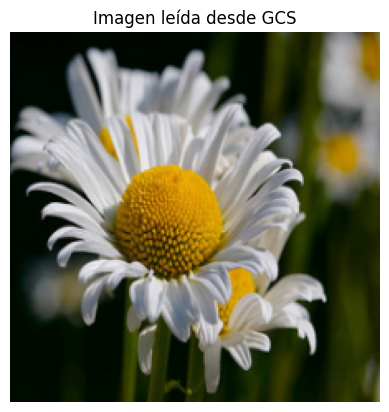

In [8]:
# Ejemplo de uso: leer una imagen específica desde GCS
import numpy as np
example_filename = "gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/daisy/754296579_30a9ae018c_n.jpg"  # Actualiza según una imagen válida
img_tensor = read_and_decode_gcs(example_filename)

# Visualizar la imagen transformada (se debe transponer de [C, H, W] a [H, W, C])
plt.imshow(img_tensor.permute(1, 2, 0).numpy())
plt.title("Imagen leída desde GCS")
plt.axis("off")
plt.show()

practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/tulips/100930342_92e8746431_n.jpg
practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/tulips/10094729603_eeca3f2cb6.jpg
practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/tulips/10094731133_94a942463c.jpg
practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/tulips/10128546863_8de70c610d.jpg
practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/tulips/10163955604_ae0b830975_n.jpg


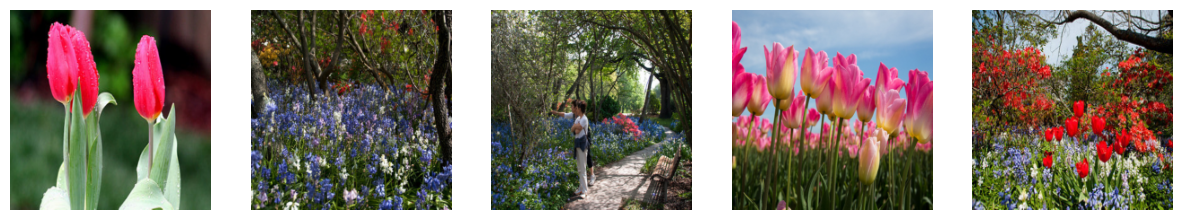

In [9]:
# notice that the file name has the flower type in it. Let's look at a few tulips
fs = gcsfs.GCSFileSystem()
tulips = fs.glob("gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/tulips/*.jpg")
f, ax = plt.subplots(1, 5, figsize=(15,15))
for idx, filename in enumerate(tulips[:5]):
  print(filename)
  img_tensor = read_and_decode_gcs(filename, reshape_dims=(IMG_HEIGHT, IMG_WIDTH))
  # Los tensores de PyTorch tienen forma [C, H, W], se transpone a [H, W, C] para matplotlib
  ax[idx].imshow(img_tensor.permute(1, 2, 0).numpy())
  ax[idx].axis('off')
plt.show()

In [10]:
# Ruta original
path = "gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/tulips/10094731133_94a942463c.jpg"

# Eliminar el prefijo
sin_prefijo = path.replace("gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/", "")

# Dividir la cadena y tomar el primer elemento
clase = sin_prefijo.split('/')[0]

print(clase)  # Esto imprimirá: tulips

tulips


In [11]:
!pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


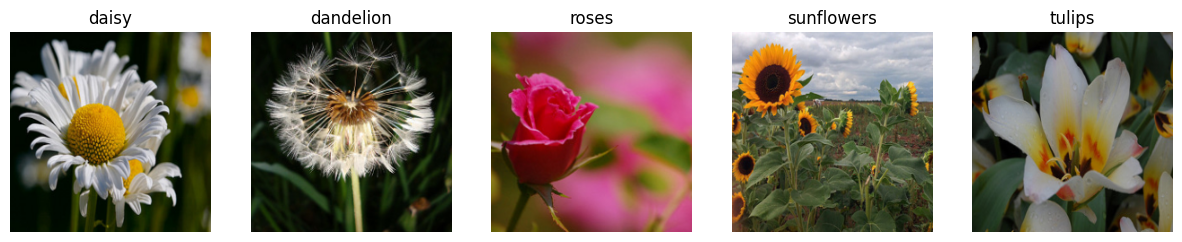

In [12]:
import matplotlib.pyplot as plt

# Función para extraer el nombre de la clase a partir del path
def get_class_name_from_path(path):
    """
    Elimina el prefijo del path y retorna el primer elemento de la división,
    que corresponde al nombre de la clase.
    """
    prefix = "gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/"
    return path.replace(prefix, "").split('/')[0]

# Lista de archivos a visualizar
filenames = [
    "gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/daisy/754296579_30a9ae018c_n.jpg",
    "gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/dandelion/3554992110_81d8c9b0bd_m.jpg",
    "gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/roses/7420699022_60fa574524_m.jpg",
    "gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/sunflowers/21518663809_3d69f5b995_n.jpg",
    "gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/tulips/8713398906_28e59a225a_n.jpg"
]

# Configuramos el tamaño de imagen deseado
IMG_HEIGHT = 224
IMG_WIDTH = 224

# Crear la figura para mostrar 5 imágenes
f, ax = plt.subplots(1, 5, figsize=(15, 15))

for idx, filename in enumerate(filenames):
    # Leer y preprocesar la imagen desde GCS
    img_tensor = read_and_decode_gcs(filename, reshape_dims=(IMG_HEIGHT, IMG_WIDTH))
    
    # Extraer el nombre de la clase a partir del path
    class_name = get_class_name_from_path(filename)
    
    # Mostrar la imagen. Se usa permute para cambiar el tensor de [C, H, W] a [H, W, C]
    ax[idx].imshow(img_tensor.permute(1, 2, 0).numpy())
    ax[idx].set_title(class_name)
    ax[idx].axis('off')

plt.show()

## A simple rule-based model

Let's get the average color of RGB values in the different
types of flowers and then classify an unknown image as
belonging to closest centroid.

In [14]:
!pip install pandas

  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 62.3 MB/s eta 0:00:00
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [18]:
import pandas as pd
df = pd.read_csv("gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/train_set.csv")
print(df.head())

  gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/daisy/754296579_30a9ae018c_n.jpg  \
0  gs://practical-ml-vision-book-data/flowers_5_j...                                                 
1  gs://practical-ml-vision-book-data/flowers_5_j...                                                 
2  gs://practical-ml-vision-book-data/flowers_5_j...                                                 
3  gs://practical-ml-vision-book-data/flowers_5_j...                                                 
4  gs://practical-ml-vision-book-data/flowers_5_j...                                                 

       daisy  
0  dandelion  
1  dandelion  
2  dandelion  
3      daisy  
4      roses  


In [22]:
import pandas as pd
from torch.utils.data import Dataset
import torch
from torch.utils.data import DataLoader

class FlowerDataset(Dataset):
    def __init__(self, csv_path):
        """
        Inicializa el dataset leyendo el CSV desde GCS.
        Se asume que el CSV tiene al menos dos columnas: "path" y "flower".
        """
        # pd.read_csv es compatible con rutas gs:// si gcsfs está instalado
        self.df = pd.read_csv(csv_path)
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        # Obtener la fila correspondiente
        row = self.df.iloc[idx]
        #filename = row['path']    # nombre de la columna con la ruta de la imagen
        #label = row['flower']     # nombre de la columna con la etiqueta (string)
        filename= row.iloc[0]
        label= row.iloc[1]
        
        # Leer y procesar la imagen
        img = read_and_decode_gcs(filename, reshape_dims=(IMG_HEIGHT, IMG_WIDTH))
        return img, label

# Ruta del CSV en GCS
csv_path = "gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/train_set.csv"

# Crear una instancia del dataset
dataset = FlowerDataset(csv_path)

# Para iterar de forma sencilla, podemos usar un DataLoader con batch_size=1 (o iterar directamente sobre el dataset)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

# Iterar sobre las primeras 3 muestras y calcular el promedio de píxeles en cada imagen
for i, (img, label) in enumerate(dataloader):
    if i >= 3:
        break
    # La imagen tiene forma [1, C, H, W]; se calcula el promedio en las dimensiones de H y W (dimensiones 2 y 3)
    avg = torch.mean(img, dim=[2, 3])
    print("Label:", label[0], "Average pixel values per channel:", avg[0])


Label: dandelion Average pixel values per channel: tensor([0.3247, 0.3247, 0.3247])
Label: dandelion Average pixel values per channel: tensor([0.2078, 0.1334, 0.0760])
Label: dandelion Average pixel values per channel: tensor([0.2485, 0.2580, 0.1900])


This will take a while if we do all the images,
since there are about 800 images
per type of flower. Later in the book, we will look at
ways to speed up full passes through the data.

In [23]:
import torch

class Centroid:
    def __init__(self, label):
        self.label = label
        self.sum_so_far = None  # Se inicializará con el primer valor recibido
        self.count_so_far = 0
  
    def update(self, value):
        """
        Actualiza el acumulado y el contador con el nuevo valor (por ejemplo, el promedio de píxeles de la imagen).
        """
        if self.sum_so_far is None:
            self.sum_so_far = value.clone()
        else:
            self.sum_so_far = self.sum_so_far + value
        self.count_so_far += 1
        if self.count_so_far % 100 == 0:
            print(self.label, self.count_so_far)
  
    def centroid(self):
        """
        Retorna el centroide calculado como la media acumulada.
        """
        return self.sum_so_far / self.count_so_far
  
    def __str__(self):
        # Se convierte el tensor a numpy para la representación en cadena.
        return '{} {}'.format(self.label, self.centroid().cpu().numpy())


class CentroidRule:
    def __init__(self, class_names):
        """
        Recibe una lista de nombres de clases y crea un objeto Centroid para cada una.
        """
        self.centroids = {f: Centroid(f) for f in class_names}
  
    def fit(self, dataset):
        """
        Itera sobre el dataset (se espera que cada elemento sea una tupla (img, label)) y actualiza el
        centroide correspondiente con el promedio de píxeles de cada imagen.
        """
        for img, label in dataset:
            # Convertir la etiqueta a string en caso de que venga como tensor
            if isinstance(label, torch.Tensor):
                # Si la etiqueta es un tensor escalar o de 1 elemento, se extrae su valor
                label = label.item() if label.dim() == 0 or label.numel() == 1 else label[0]
                # En caso de ser bytes, se decodifica a UTF-8
                if isinstance(label, bytes):
                    label = label.decode("utf-8")
            # Se calcula el promedio de píxeles a lo largo de las dimensiones espaciales (H y W).
            avg = torch.mean(img, dim=[1, 2])  # img tiene forma (C, H, W)
            self.centroids[label].update(avg)
  
    def predict(self, img):
        """
        Dada una imagen, calcula su promedio de píxeles y retorna la etiqueta cuyo centroide sea
        el más cercano (medido con la suma de las diferencias absolutas).
        """
        avg = torch.mean(img, dim=[1, 2])
        best_label = None
        best_diff = float('inf')
        for key, centroid_obj in self.centroids.items():
            diff = torch.sum(torch.abs(avg - centroid_obj.centroid()))
            if diff < best_diff:
                best_diff = diff
                best_label = key
        return best_label
  
    def evaluate(self, dataset):
        """
        Evalúa el dataset retornando la precisión (accuracy) basada en la regla del centroide.
        """
        num_correct, total_images = 0, 0
        for img, label in dataset:
            # Convertir la etiqueta a string si es necesario
            if isinstance(label, torch.Tensor):
                label = label.item() if label.dim() == 0 or label.numel() == 1 else label[0]
                if isinstance(label, bytes):
                    label = label.decode('utf-8')
            predicted = self.predict(img)
            if label == predicted:
                num_correct += 1
            total_images += 1
        accuracy = num_correct / total_images if total_images > 0 else 0
        return accuracy


In [24]:
from torch.utils.data import DataLoader, Subset
train_csv_path = "gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/train_set.csv"
eval_csv_path  = "gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/eval_set.csv"

# --- Crear los datasets usando el dataset custom ---
full_train_dataset = FlowerDataset(train_csv_path)
full_eval_dataset  = FlowerDataset(eval_csv_path)

# Limitar el dataset a las primeras 500 muestras para entrenamiento y 50 para evaluación.
train_dataset = Subset(full_train_dataset, list(range(500)))
eval_dataset  = Subset(full_eval_dataset, list(range(50)))

# Crear DataLoaders (batch_size=1 para simplificar el procesamiento
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)
eval_loader  = DataLoader(eval_dataset, batch_size=1, shuffle=False)

# --- Instanciar la regla de centroides ---
rule = CentroidRule(CLASS_NAMES)

# --- Ajustar (fit) el modelo con el dataset de entrenamiento ---
print("Entrenando (fit) el modelo con el dataset de entrenamiento...")
for img, label in train_loader:
    # img tiene forma [1, C, H, W] y label es una lista con un string.
    # Eliminamos la dimensión del batch:
    img = img.squeeze(0)  # ahora img tiene forma [C, H, W]

    # Se calcula el promedio de píxeles a lo largo de las dimensiones espaciales (H y W)
    # Esto equivale a tf.reduce_mean(img, axis=[0,1]) en TensorFlow, pero en PyTorch
    # como el tensor es [C, H, W] se hace torch.mean(img, dim=[1,2])
    avg = torch.mean(img, dim=[1, 2])
    
    # Actualizamos el centroide correspondiente a la etiqueta.
    # Se asume que label es una lista con un string, por lo que tomamos label[0].
    rule.centroids[label[0]].update(avg)

# --- Mostrar algunos centroides ---
print("\nCentroid para 'daisy':", rule.centroids['daisy'])
print("Centroid para 'roses':", rule.centroids['roses'])

# --- Evaluar el modelo con el dataset de evaluación ---
num_correct = 0
total_images = 0

for img, label in eval_loader:
    img = img.squeeze(0)  # img de forma [C, H, W]
    predicted = rule.predict(img)
    correct = label[0]  # Se espera que label sea un string
    if predicted == correct:
        num_correct += 1
    total_images += 1

accuracy = num_correct / total_images if total_images > 0 else 0
print("\nAccuracy en el dataset de evaluación:", accuracy)


Entrenando (fit) el modelo con el dataset de entrenamiento...
dandelion 100
tulips 100

Centroid para 'daisy': daisy [0.45072332 0.4506146  0.36522076]
Centroid para 'roses': roses [0.4720923  0.37672406 0.31946233]

Accuracy en el dataset de evaluación: 0.28


That's pretty much a random guess!!

In [25]:
# this is how you'd use the model to predict
filename = "gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/dandelion/3554992110_81d8c9b0bd_m.jpg"
img = read_and_decode_gcs(filename, [IMG_HEIGHT, IMG_WIDTH])
pred = rule.predict(img)
print(pred)

dandelion


## A linear model
What if you apply different weights each of the pixels?
Let's use the Keras API

In [33]:
# Flowerdataset changed so that the label is the index into CLASS_NAMES array
import pandas as pd
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch
import torch.nn as nn

class FlowerDataset(Dataset):
    def __init__(self, csv_path):
        # Lee el CSV desde GCS. Se requiere que gcsfs esté instalado para rutas gs://.
        self.df = pd.read_csv(csv_path)
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        # Se asume que el CSV tiene dos columnas: 'path' y 'flower'
        row = self.df.iloc[idx]
        #filename = row['path']
        #label_string = row['flower']
        filename= row.iloc[0]
        label_string= row.iloc[1]
        # Leer la imagen utilizando la función previamente definida.
        img = read_and_decode_gcs(filename, reshape_dims=(IMG_HEIGHT, IMG_WIDTH))
        # Convertir la etiqueta (string) al índice correspondiente en CLASS_NAMES.
        label = CLASS_NAMES.index(label_string)
        return img, label


train_csv_path = "gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/train_set.csv"
eval_csv_path  = "gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/eval_set.csv"

train_dataset = FlowerDataset(train_csv_path)
eval_dataset  = FlowerDataset(eval_csv_path)

train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
eval_loader  = DataLoader(eval_dataset, batch_size=10, shuffle=False)

# linear model
class LinearModel(nn.Module):
    def __init__(self, num_classes):
        super(LinearModel, self).__init__()
        self.flatten = nn.Flatten()
        # Las imágenes vienen en formato [C, H, W]. La dimensión de entrada es:
        # IMG_CHANNELS * IMG_HEIGHT * IMG_WIDTH.
        self.fc = nn.Linear(IMG_CHANNELS * IMG_HEIGHT * IMG_WIDTH, num_classes)
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.fc(x)
        return x

model = LinearModel(num_classes=len(CLASS_NAMES))

In [34]:
!pip install torchsummary
!pip install torchviz


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [35]:


from torchsummary import summary
from torchviz import make_dot
# Suponiendo que IMG_CHANNELS, IMG_HEIGHT e IMG_WIDTH están definidos, por ejemplo:
# IMG_CHANNELS = 3, IMG_HEIGHT = 224, IMG_WIDTH = 224

# Imprimir el resumen del modelo:
summary(model, input_size=(IMG_CHANNELS, IMG_HEIGHT, IMG_WIDTH))

dummy_input = torch.randn(1, IMG_CHANNELS, IMG_HEIGHT, IMG_WIDTH).to(device)

# Realizar una pasada hacia adelante para obtener la salida
output = model(dummy_input)

# Crear y visualizar el grafo computacional
dot = make_dot(output, params=dict(model.named_parameters()))
dot.render("model_graph", format="png")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1               [-1, 150528]               0
            Linear-2                    [-1, 5]         752,645
Total params: 752,645
Trainable params: 752,645
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.57
Forward/backward pass size (MB): 1.15
Params size (MB): 2.87
Estimated Total Size (MB): 4.59
----------------------------------------------------------------


'model_graph.png'

Configuramos el entrenamiento ...

In [37]:
import torch.optim as optim

import torch
import torch.nn as nn
import torch.optim as optim


# Supongamos que 'model', 'train_loader' y 'eval_loader' ya están definidos.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10

# Diccionario para almacenar las métricas
history = {
    'loss': [],
    'val_loss': [],
    'accuracy': [],
    'val_accuracy': []
}

# Función para calcular precisión (accuracy)
def compute_accuracy(outputs, labels):
    _, preds = torch.max(outputs, 1)
    return (preds == labels).float().mean().item()

# Bucle de entrenamiento
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_acc = 0.0
    total_train = 0
    
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * imgs.size(0)
        running_acc += compute_accuracy(outputs, labels) * imgs.size(0)
        total_train += imgs.size(0)
    
    epoch_loss = running_loss / total_train
    epoch_acc = running_acc / total_train
    history['loss'].append(epoch_loss)
    history['accuracy'].append(epoch_acc)
    
    # Validación
    model.eval()
    val_running_loss = 0.0
    val_running_acc = 0.0
    total_val = 0
    with torch.no_grad():
        for imgs, labels in eval_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            
            val_running_loss += loss.item() * imgs.size(0)
            val_running_acc += compute_accuracy(outputs, labels) * imgs.size(0)
            total_val += imgs.size(0)
    
    val_loss = val_running_loss / total_val
    val_acc = val_running_acc / total_val
    history['val_loss'].append(val_loss)
    history['val_accuracy'].append(val_acc)
    
    print(f"Epoch {epoch+1}/{num_epochs}: loss={epoch_loss:.4f}, accuracy={epoch_acc:.4f}, "
          f"val_loss={val_loss:.4f}, val_accuracy={val_acc:.4f}")

KeyboardInterrupt: 

In [39]:
import matplotlib.pyplot as plt

# Función para graficar las métricas
def training_plot(metrics, history):
    f, ax = plt.subplots(1, len(metrics), figsize=(15,5))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history[metric])
        ax[idx].set_xlabel("Epochs")
        ax[idx].plot(history['val_' + metric], ls='dashed')
        ax[idx].legend([metric, 'val_' + metric], fontsize=20)
    plt.show()

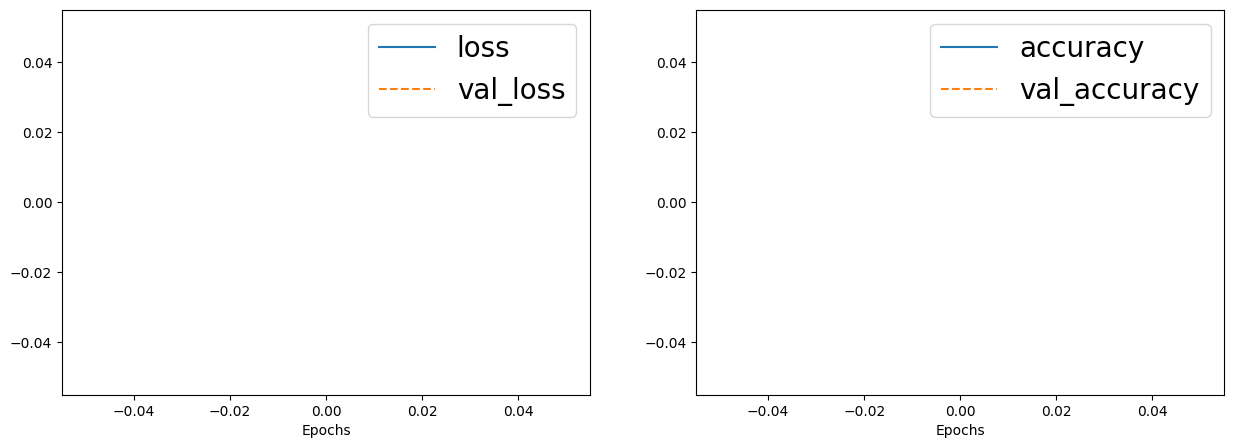

In [40]:
# Graficar 'loss' y 'accuracy'
training_plot(['loss', 'accuracy'], history)

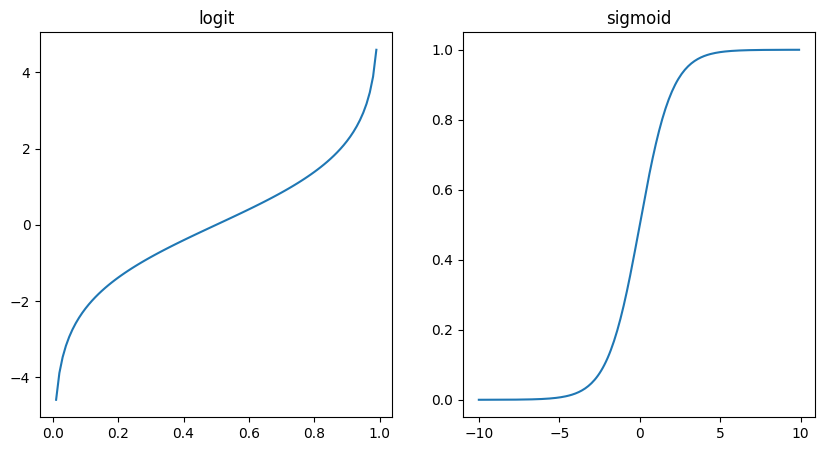

[0.09405971 0.0570501  0.8488902 ]
[0.04838873 0.0721875  0.8794238 ]


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F  # Para usar funciones como softmax

# Crear figura y ejes para graficar
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico de la función logit (inversa de la sigmoide)
x = np.arange(0.01, 1.0, 0.01)
y = np.log(x / (1 - x))
ax[0].plot(x, y)
ax[0].set_title("logit")

# Gráfico de la función sigmoide
x2 = np.arange(-10.0, 10.0, 0.1)
# Convertir a tensor de PyTorch
x2_tensor = torch.tensor(x2, dtype=torch.float32)
y2 = torch.sigmoid(x2_tensor)
ax[1].plot(x2, y2.numpy())
ax[1].set_title("sigmoid")

plt.show()

# Calcular softmax para dos conjuntos de valores y mostrarlos
softmax_1 = F.softmax(torch.tensor([-1.0, -1.5, 1.2]), dim=0)
softmax_2 = F.softmax(torch.tensor([0.1, 0.5, 3.0]), dim=0)

print(softmax_1.numpy())
print(softmax_2.numpy())

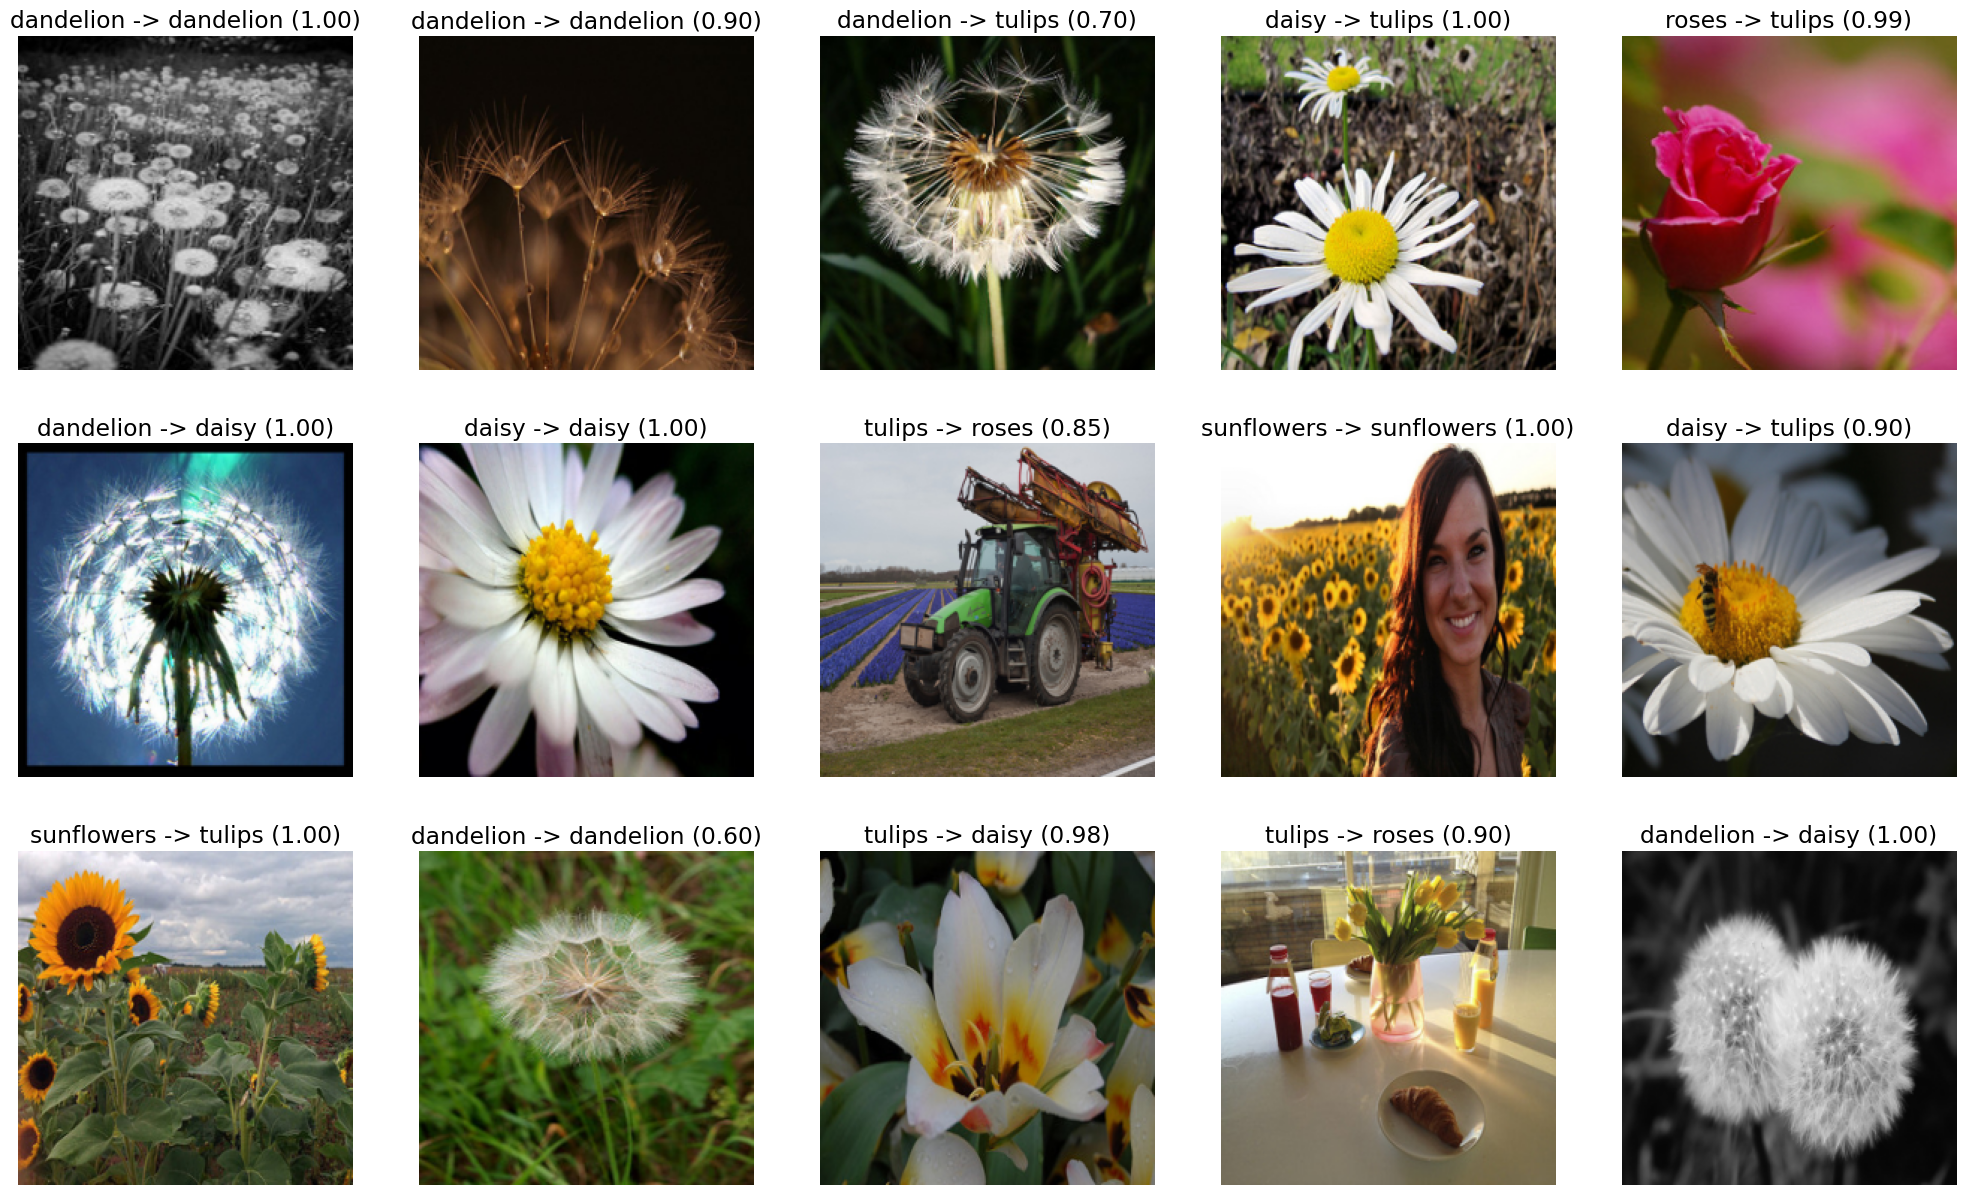

In [42]:
import torch.nn.functional as F

def plot_predictions(filename):
    # Actualiza el tamaño de fuente para la gráfica
    plt.rcParams.update({'font.size': 14})
    
    # Crear una figura con 3 filas y 5 columnas
    f, ax = plt.subplots(3, 5, figsize=(25, 15))
    
    # Crear el dataset usando el CSV (se asume que FlowerDataset ya está definido)
    dataset = FlowerDataset(filename)
    
    # Usar sólo los primeros 15 ejemplos
    indices = list(range(15))
    subset = Subset(dataset, indices)
    loader = DataLoader(subset, batch_size=1, shuffle=False)
    
    # Poner el modelo en modo evaluación
    model.eval()
    
    # Iterar sobre las 15 muestras sin calcular gradientes
    with torch.no_grad():
        for idx, (img, label) in enumerate(loader):
            # img tiene forma [1, C, H, W]; label es un tensor con el índice
            # Mover la imagen al dispositivo (GPU o CPU)
            img = img.to(device)
            
            # Mostrar la imagen: convertir de [1, C, H, W] a [H, W, C]
            img_np = img.squeeze(0).cpu().permute(1, 2, 0).numpy()
            ax[idx // 5, idx % 5].imshow(img_np)
            
            # Realizar la predicción: pasar la imagen por el modelo
            output = model(img)  # output tiene forma [1, num_classes]
            # Aplicar softmax para obtener probabilidades (si el modelo no las entrega ya)
            probs = F.softmax(output, dim=1)
            pred_val, pred_idx = torch.max(probs, dim=1)
            
            # Extraer el índice (como entero) y la probabilidad
            pred_idx = pred_idx.item()
            prob = pred_val.item()
            
            # Convertir la etiqueta verdadera (índice) a string usando CLASS_NAMES
            true_label = CLASS_NAMES[label.item()]
            pred_label = CLASS_NAMES[pred_idx]
            
            # Establecer el título: 'true_label -> pred_label (probabilidad)'
            ax[idx // 5, idx % 5].set_title(f'{true_label} -> {pred_label} ({prob:.2f})')
            ax[idx // 5, idx % 5].axis('off')
    
    plt.show()

# Llamar a la función de graficado usando, por ejemplo, el CSV de entrenamiento
plot_predictions("gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/train_set.csv")


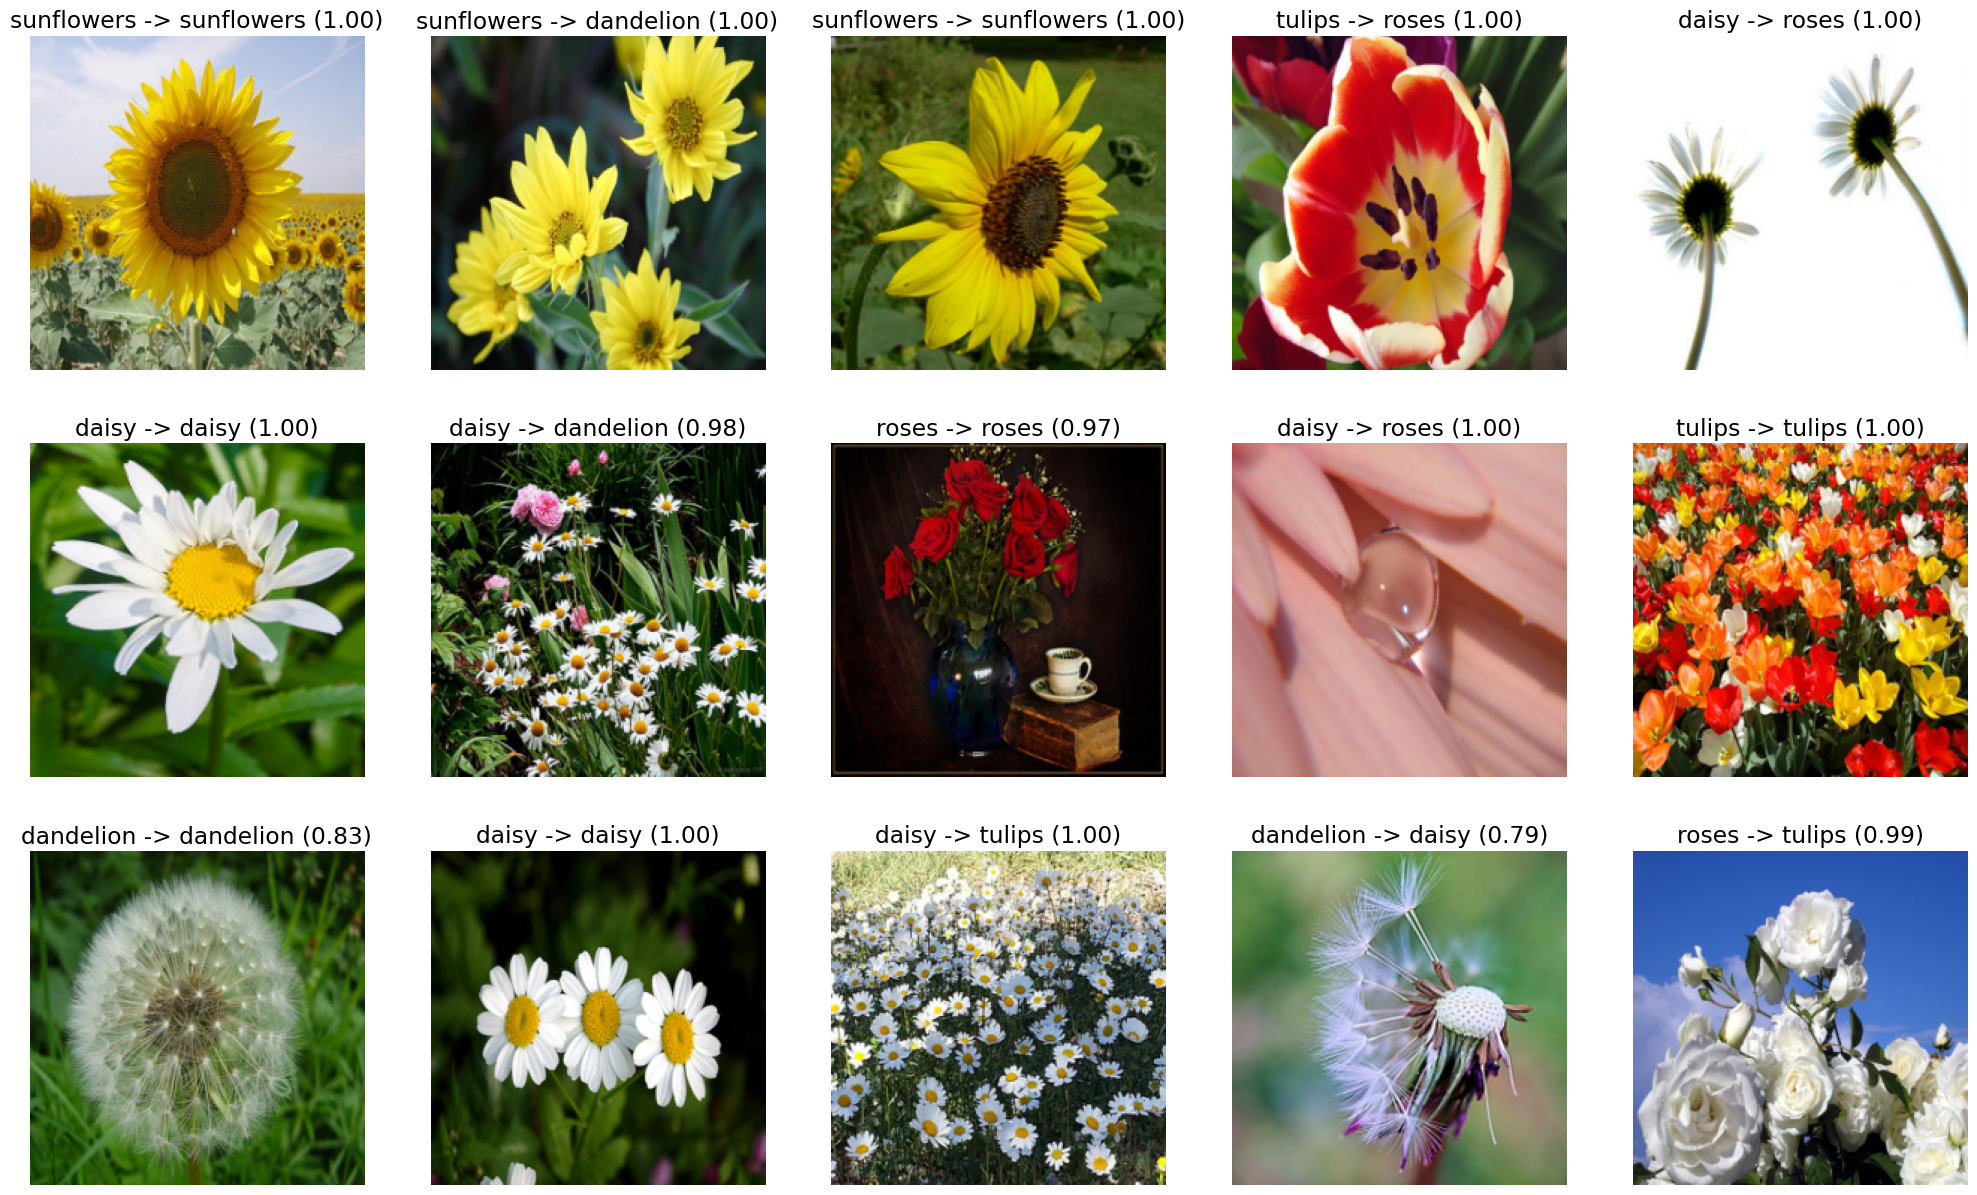

In [43]:
plot_predictions("gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/eval_set.csv")

Scaling weights for daisy in -0.025167077779769897 to 0.03828129917383194
Scaling weights for dandelion in -0.022662313655018806 to 0.022978583350777626
Scaling weights for roses in -0.020925557240843773 to 0.028608668595552444
Scaling weights for sunflowers in -0.03411714360117912 to 0.02634742483496666
Scaling weights for tulips in -0.022413183003664017 to 0.029248954728245735


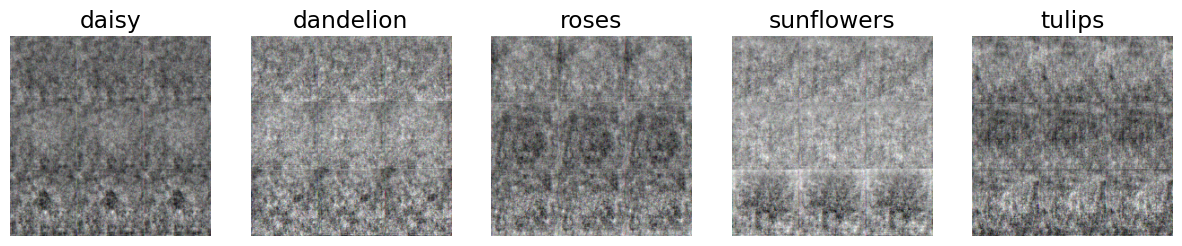

In [44]:
def show_trained_weights(model):
    # Se asume que CLASS_NAMES es algo como:
    # CLASS_NAMES = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
    f, ax = plt.subplots(1, len(CLASS_NAMES), figsize=(15, 15))
    for flower in range(len(CLASS_NAMES)):
        # En PyTorch, model.fc.weight tiene forma (num_classes, input_dim)
        # Extraemos la fila correspondiente a la clase "flower"
        weights = model.fc.weight[flower, :].detach().cpu()
        min_wt = weights.min().item()
        max_wt = weights.max().item()
        flower_name = CLASS_NAMES[flower]
        print("Scaling weights for {} in {} to {}".format(flower_name, min_wt, max_wt))
        
        # Escalar los pesos al rango [0, 1]
        weights_scaled = (weights - min_wt) / (max_wt - min_wt)
        # Reestructurar para visualizar: reshape a (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
        weights_img = weights_scaled.reshape(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS).numpy()
        
        ax[flower].imshow(weights_img)
        ax[flower].set_title(flower_name)
        ax[flower].axis('off')
    
    plt.show()

# Llamada a la función:
show_trained_weights(model)


## Diagrams


[0.   0.09 0.06 0.85 0.  ] [1.7154420e-08 1.6965916e-02 1.0949632e-02 9.7208452e-01 1.7154420e-08]
[0.09090909 0.09090909 0.6363636  0.09090909 0.09090909] [0.04651164 0.04651164 0.8139535  0.04651164 0.04651164]
[0.   0.25 0.5  0.25 0.  ] [6.0000005e-08 1.9999996e-01 5.9999990e-01 1.9999996e-01 6.0000005e-08]
[0.08333333 0.08333333 0.3333333  0.41666666 0.08333333] [0.06113537 0.06113537 0.33624452 0.48034936 0.06113537]
[0.12499999 0.12499999 0.49999997 0.12499999 0.12499999] [0.09090909 0.09090909 0.6363636  0.09090909 0.09090909]


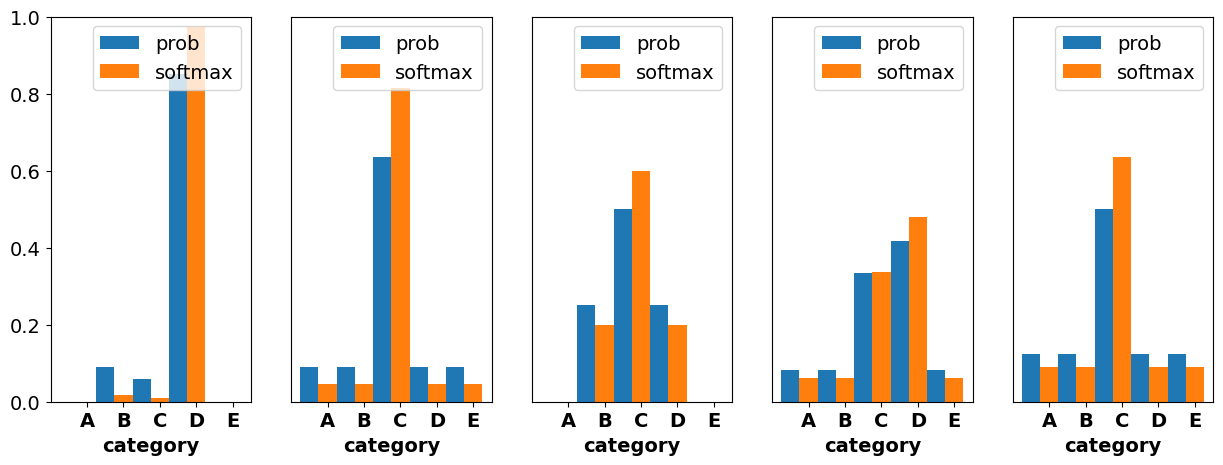

In [45]:
# Datos de entrada
inx = [
    [0, 0.09, 0.06, 0.85, 0],
    [0.1, 0.1, 0.7, 0.1, 0.1],
    [0, 0.2, 0.4, 0.2, 0],
    [0.1, 0.1, 0.4, 0.5, 0.1],
    [0.2, 0.2, 0.8, 0.2, 0.2],
]

# Función logit en PyTorch (recordar que logit = ln(p/(1-p)))
def logit(x):
    # Evitar división por cero o logaritmo de cero, se podría añadir un pequeño epsilon
    eps = 1e-7
    x = torch.clamp(x, eps, 1.0 - eps)
    return -torch.log(1. / x - 1.)

barWidth = 0.5
r1 = np.arange(len(inx[0]))
r2 = [x + barWidth for x in r1]

# Crear figura para 5 gráficos
fig, ax = plt.subplots(1, 5, figsize=(15, 5))

for idx, row in enumerate(inx):
    # Convertir la fila a tensor de tipo float
    x_tensor = torch.tensor(row, dtype=torch.float32)
    
    # Calcular la distribución de probabilidad dividiendo cada elemento por la suma total
    prob = x_tensor / torch.sum(x_tensor)
    
    # Calcular la función logit y luego aplicar softmax
    # Se usa softmax sobre la dimensión 0 porque es un vector unidimensional
    softmax_vals = F.softmax(logit(prob), dim=0)
    
    # Imprimir los valores (convertidos a numpy para mostrarlos)
    print(prob.numpy(), softmax_vals.numpy())
    
    # Graficar las barras: una para "prob" y otra para "softmax"
    ax[idx].bar(r1, prob.numpy(), width=barWidth, label='prob')
    ax[idx].bar(r2, softmax_vals.numpy(), width=barWidth, label='softmax')
    
    ax[idx].set_xlabel('category', fontweight='bold')
    ax[idx].set_xticks(r2)
    ax[idx].set_xticklabels(['A', 'B', 'C', 'D', 'E'], fontweight='bold')
    ax[idx].set_ylim([0, 1])
    if idx > 0:
        ax[idx].yaxis.set_visible(False)
    ax[idx].legend()

plt.show()


Copyright 2020 Google Inc. Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0 Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.